## Install Packages

In [1]:
import numpy as np
import pandas as pd
import unicodedata

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import pickle

import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Read Data

In [3]:
data = pd.read_excel('../dataset/original/salary_dataset.xlsx')

In [4]:
df = data.copy()

## Data Cleaning

In [5]:
df.columns

Index(['level', 'position', 'tech_stack', 'experience', 'gender', 'company',
       'company_size', 'work_type', 'city', 'currency', 'salary',
       'raise_period'],
      dtype='object')

### Missing Values

In [6]:
df.isna().sum()

level           0
position        0
tech_stack      1
experience      0
gender          0
company         0
company_size    0
work_type       0
city            0
currency        0
salary          0
raise_period    0
dtype: int64

In [7]:
df.dropna(subset=['tech_stack'], inplace=True)

### Duplicated Columns

In [8]:
# Find duplicate rows
duplicate_rows = df[df.duplicated()]

# Filter duplicate rows with all columns the same
all_columns_same_duplicates = duplicate_rows[duplicate_rows.duplicated(keep=False)]

# Show the duplicates where all columns are the same
#print(all_columns_same_duplicates)

## EDA

### position

In [9]:
# there are differences to ignore it lower 
df["position"] = df["position"].str.lower()

In [10]:
df["position"].value_counts()

position
back-end developer                                    1486
full stack developer                                  1442
front-end developer                                    602
team / tech lead                                       395
mobile application developer (android)                 178
embedded software developer                            173
software development manager / engineering manager     165
mobile application developer (full stack)              161
mobile application developer (ios)                     142
software architect                                     140
devops engineer                                        112
data scientist                                         103
qa / automation                                         97
game developer                                          97
qa / manuel test                                        87
project manager                                         83
product owner                                  

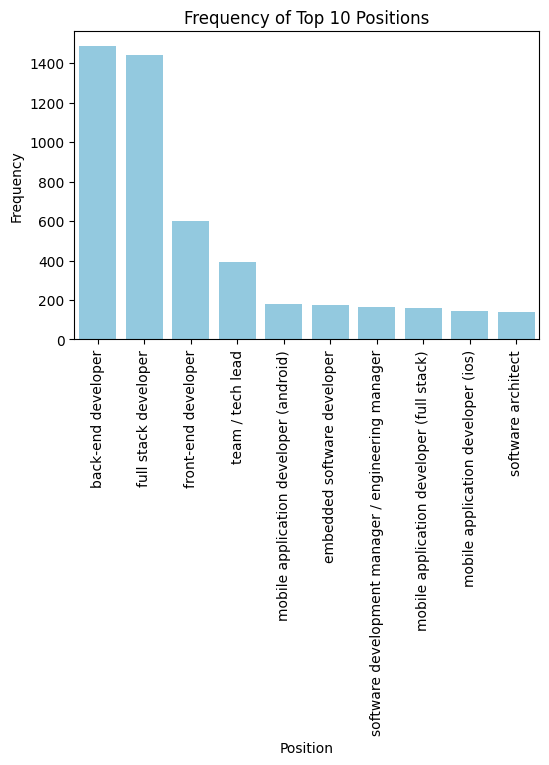

In [11]:
# Get the top 10 positions
top_10_positions = df['position'].value_counts().head(10)

# Plotting
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
sns.countplot(data=df, x='position', order=top_10_positions.index, color='skyblue')
plt.title('Frequency of Top 10 Positions')
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('top_10_positions_frequency.png', bbox_inches='tight')  # Use bbox_inches='tight' to fit the entire plot

# Show the plot
plt.show()

### level

In [12]:
df["level"].value_counts()

level
Senior    2988
Middle    1937
Junior    1063
Name: count, dtype: int64

In [13]:
# Define the mapping dictionary
mapping = {
    'Junior': 0,
    'Middle': 1,
    'Senior': 2,
}

# Map the experience categories to the scale
df['level'] = df['level'].map(mapping)

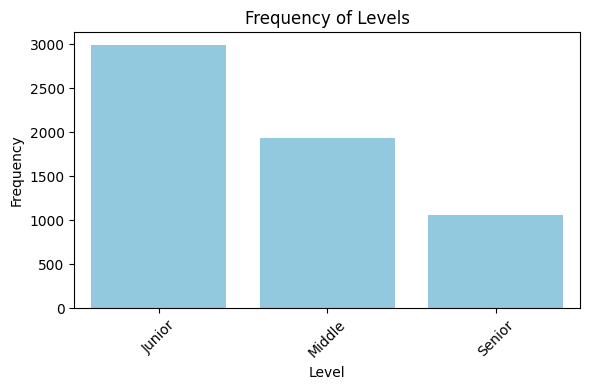

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the frequency of the 'level' column
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='level', order=df['level'].value_counts().index, color="skyblue")
plt.title('Frequency of Levels')
plt.xlabel('Level')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xticks(ticks=[0, 1, 2], labels=['Junior', 'Middle', 'Senior'])
plt.tight_layout()

# Save the plot as an image file (e.g., PNG)
plt.savefig('frequency_of_levels.png')

# Show the plot
plt.show()

### tech_stack

In [15]:
df.tech_stack.value_counts().head()

tech_stack
.Net                            820
Java                            556
Python                          206
.Net;JavaScript | Html | Css    176
C / C++                         125
Name: count, dtype: int64

### known_number_of_tech

In [16]:
# Count number of known technologies
df['known_number_of_tech'] = df['tech_stack'].apply(lambda x: len(x.split(';')))

In [17]:
# Drop the 'tech_stack' column
df.drop('tech_stack', axis=1, inplace=True)

### experience

In [18]:
df["experience"].value_counts()

experience
1 - 3 Yıl          1474
3 - 5 Yıl          1190
5 - 7 Yıl           848
7 - 10 Yıl          779
15 Yıl ve üzeri     512
10 - 12 Yıl         474
12 - 14 Yıl         363
0 - 1 Yıl           348
Name: count, dtype: int64

In [19]:
# Define the mapping dictionary
mapping = {
    '0 - 1 Yıl': 0,
    '1 - 3 Yıl': 1,
    '3 - 5 Yıl': 2,
    '5 - 7 Yıl': 3,
    '7 - 10 Yıl': 4,
    '10 - 12 Yıl': 5,
    '12 - 14 Yıl': 6,
    '15 Yıl ve üzeri': 7
}

# Map the experience categories to the scale
df['experience'] = df['experience'].map(mapping)

In [20]:
df['experience'].value_counts()

experience
1    1474
2    1190
3     848
4     779
7     512
5     474
6     363
0     348
Name: count, dtype: int64

### gender

In [21]:
# Define the mapping dictionary
mapping = {
    'Erkek': 0,
    'Kadın': 1,
}

# Map the experience categories to the scale
df['gender'] = df['gender'].map(mapping)

In [22]:
df['gender'].value_counts()

gender
0    5288
1     700
Name: count, dtype: int64

### company_size

In [23]:
df["company_size"].value_counts()

company_size
250+              2939
21 - 50 Kişi       673
101 - 249 Kişi     668
51 - 100 Kişi      627
11 - 20 Kişi       501
6 - 10 Kişi        339
1 - 5 Kişi         241
Name: count, dtype: int64

In [24]:
# Define the mapping dictionary
mapping = {
    '1 - 5 Kişi': 0,
    '6 - 10 Kişi': 1,
    '11 - 20 Kişi': 2,
    '21 - 50 Kişi': 3,
    '51 - 100 Kişi': 4,
    '101 - 249 Kişi': 5,
    '250+': 6
}

# Map the experience categories to the scale
df["company_size"] = df["company_size"].map(mapping)

### company

In [25]:
df["company"] = df["company"].str.lower()

### city

In [26]:
df["city"].value_counts().head(10)

city
İstanbul      3174
Ankara        1050
İzmir          455
Kocaeli        199
Bursa          156
Antalya         95
* Almanya       69
Eskişehir       55
* Hollanda      44
Samsun          43
Name: count, dtype: int64

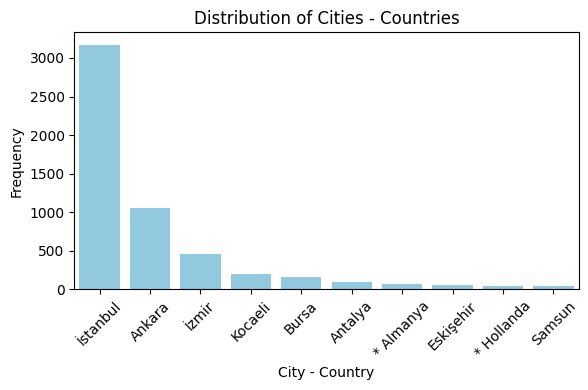

In [27]:
# Plotting the distribution of the 'city' column
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='city', order=df['city'].value_counts().head(10).index, color='skyblue')
plt.title('Distribution of Cities - Countries')
plt.xlabel('City - Country')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
# Save the plot as an image file
plt.savefig('city_distribution.png')  # You can specify the file format (e.g., 'city_distribution.jpg')
# Show the plot
plt.show()

### salary

In [28]:
df["salary"].nunique()

99

### currency

In [29]:
df["currency"].value_counts()

currency
₺ - Türk Lirası    5353
$ - Dolar           353
€ - Euro            232
£ - Sterlin          50
Name: count, dtype: int64

### Conversion of currencies

In [30]:
# Define a function to convert salary ranges to numerical values
def convert_salary_range_to_numeric(salary_range):
    # Check if salary range contains a '+'
    if '+' in salary_range:
        salary_range = salary_range.replace('+', '')  # Remove '+'
        return round(float(salary_range.replace(',', '')), 3)  # Convert and round
    else:
        # Extract the lower and upper bounds from the salary range string
        lower, upper = map(float, salary_range.split(' - '))
        # Calculate the average of the lower and upper bounds and round to three decimal places
        return round((lower + upper) / 2, 3)

# Define a function to format salary
def format_salary(salary):
    return '{:,.3f}'.format(salary)

# Convert salary ranges to numerical values
df['salary'] = df['salary'].apply(convert_salary_range_to_numeric)

# Convert currencies to multipliers
currency_multipliers = {
    '₺ - Türk Lirası': 1,
    '$ - Dolar': 32,
    '€ - Euro': 35,
    '£ - Sterlin': 40
}

# Apply currency conversion
df['converted_salary'] = df.apply(lambda row: row['salary'] * currency_multipliers[row['currency']], axis=1)

# Format the output salaries
df['converted_salary'] = df['converted_salary'].apply(format_salary)

In [31]:
# Define the mapping dictionary
mapping = {
    '₺ - Türk Lirası': 0,
    '$ - Dolar': 1,
    '€ - Euro': 2,
    '£ - Sterlin': 3
}

# Map the experience categories to the scale
df["currency"] = df["currency"].map(mapping)

In [32]:
df.drop('salary', axis=1, inplace=True)

### raise_period

In [33]:
df.raise_period.value_counts()

raise_period
2    3547
1    2220
4     129
3      92
Name: count, dtype: int64

### city and salary

In [34]:
# Convert 'converted_salary' column to numeric, coerce errors to NaN
df['converted_salary'] = pd.to_numeric(df['converted_salary'], errors='coerce')

# Drop rows with NaN values in 'converted_salary' column
df = df.dropna(subset=['converted_salary'])

# Group by city and calculate the mean salary within each group
city_salary_stats = df.groupby('city')['converted_salary'].mean()

# Sort cities by average salary in descending order
city_salary_stats_sorted = city_salary_stats.sort_values(ascending=False)

# Show only the top 10 cities
top_10_cities = city_salary_stats_sorted.head(10)

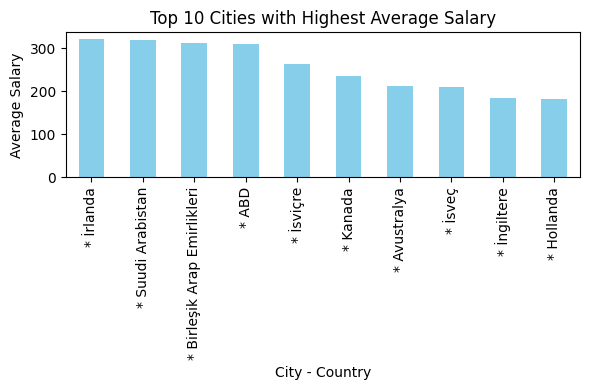

In [35]:
# Plotting
plt.figure(figsize=(6, 4))
top_10_cities.plot(kind='bar', color='skyblue')
plt.title('Top 10 Cities with Highest Average Salary')
plt.xlabel('City - Country')
plt.ylabel('Average Salary')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Save the plot as an image file
plt.savefig('top_10_cities_salary.png')  # You can specify the file format (e.g., 'top_10_cities_salary.jpg')

plt.show()

### work_type and salary

In [36]:
# Rename values in the 'work_type' column
df['work_type'] = df['work_type'].replace({
    'Remote': 'remote',
    'Ofis': 'ofis',
    'Hibrit (Ofis + Remote)': 'hibrit',
    'Şu an remote ama hibrite döneceğiz.': 'remote_hibrit',
    'Şu an hibrit ama ofise döneceğiz.': 'hibrit_ofis'
})

In [37]:
# Group by work_type and calculate summary statistics for salary within each group
work_type_salary_stats = df.groupby('work_type')['converted_salary'].describe()

# Sort the summary statistics by mean salary in descending order
work_type_salary_stats_sorted = work_type_salary_stats.sort_values(by='mean', ascending=False)

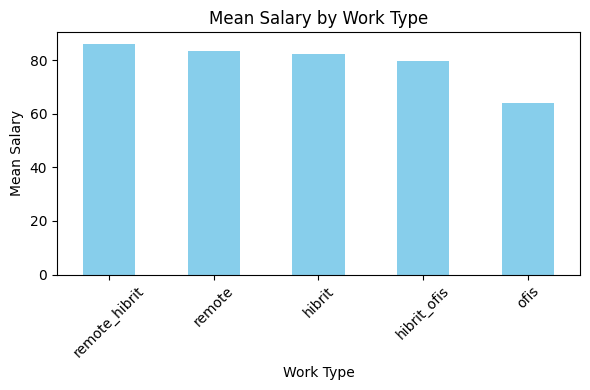

In [38]:
# Plotting
plt.figure(figsize=(6, 4))
work_type_salary_stats_sorted['mean'].plot(kind='bar', color='skyblue')
plt.title('Mean Salary by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Mean Salary')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Save the plot as an image file
plt.savefig('mean_salary_by_work_type.png')  # You can specify the file format (e.g., 'mean_salary_by_work_type.jpg')

plt.show()

### work_type

In [39]:
df["work_type"].value_counts()

work_type
remote           2686
hibrit           2250
ofis              928
remote_hibrit      90
hibrit_ofis        22
Name: count, dtype: int64

In [40]:
# Apply one-hot encoding to 'work_type' column
one_hot_encoded = pd.get_dummies(df['work_type']).add_prefix("work_type_")

# Concatenate the one-hot encoded columns with the original DataFrame
df = pd.concat([df, one_hot_encoded], axis=1)

# Drop the original 'work_type' column
df.drop('work_type', axis=1, inplace=True)

### gender and salary

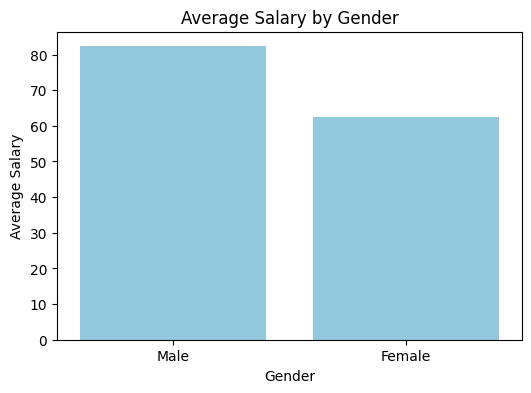

In [41]:
# Group by 'gender' and calculate the mean salary for each group
average_salary_by_gender = df.groupby('gender')['converted_salary'].mean().reset_index()

# Replace numeric values with labels
average_salary_by_gender['gender'] = average_salary_by_gender['gender'].replace({0: 'Male', 1: 'Female'})

# Plotting
plt.figure(figsize=(6, 4))
sns.barplot(x='gender', y='converted_salary', data=average_salary_by_gender, color="skyblue")
plt.title('Average Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Salary')

# Save the plot as an image file
plt.savefig('average_salary_by_gender.png')  # You can specify the file format (e.g., 'average_salary_by_gender.jpg')

plt.show()

### company and salary

In [42]:
# Group by company and calculate the mean salary within each group
company_salary_stats = df.groupby('company')['converted_salary'].mean()

# Sort companies by average salary in descending order
company_salary_stats_sorted = company_salary_stats.sort_values(ascending=False)

# Show only the top 10 companies
top_10_company = company_salary_stats_sorted.head(10)

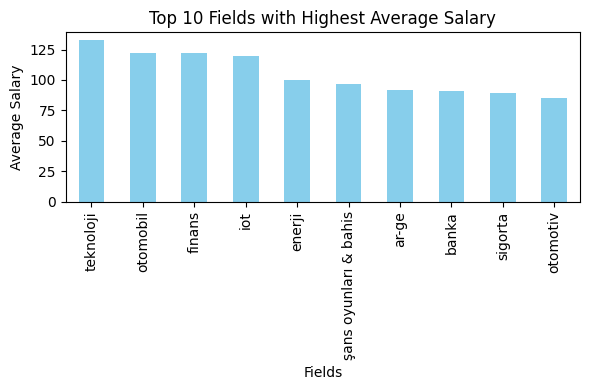

In [43]:
# Plotting
plt.figure(figsize=(6, 4))
top_10_company.plot(kind='bar', color='skyblue')
plt.title('Top 10 Fields with Highest Average Salary')
plt.xlabel('Fields')
plt.ylabel('Average Salary')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Save the plot as an image file
plt.savefig('top_10_field_average_salary.png', bbox_inches='tight')

plt.show()

### number_of_known_tech

In [44]:
# Group by company and calculate the mean salary within each group
tech_salary_stats = df.groupby('known_number_of_tech')['converted_salary'].mean()

# Sort companies by average salary in descending order
tech_salary_stats_sorted = tech_salary_stats.sort_values(ascending=False)

# Show only the top 10 companies
top_10_tech = tech_salary_stats_sorted.head(10)

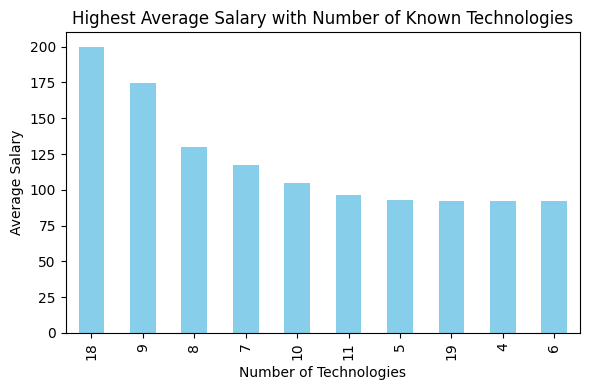

In [45]:
# Plotting
plt.figure(figsize=(6, 4))
top_10_tech.plot(kind='bar', color='skyblue')
plt.title('Highest Average Salary with Number of Known Technologies')
plt.xlabel('Number of Technologies')
plt.ylabel('Average Salary')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Save the plot as an image file
plt.savefig('highest_average_salary_with_technologies.png')

plt.show()

### City

In [46]:
# List of metropolitan cities in Turkey (lower case)
metropolitan_cities = [
    'istanbul', 'ankara', 'izmir', 'adana', 'bursa', 'gaziantep', 'konya', 'kayseri', 'antalya', 'diyarbakır',
    'eskişehir', 'erzurum', 'mersin', 'kocaeli', 'samsun', 'sakarya', 'aydın', 'balıkesir', 'denizli', 'hatay',
    'malatya', 'manisa', 'kahramanmaraş', 'mardin', 'muğla', 'ordu', 'tekirdağ', 'trabzon', 'şanlıurfa', 'van'
]

# Define a function to normalize city names
def normalize_city(city):
    city = unicodedata.normalize('NFKD', city)  # Normalize to decomposed form
    city = city.replace('ı', 'i')  # Replace 'ı' with 'i'
    city = city.replace('İ', 'i')  # Replace 'İ' with 'i'
    city = unicodedata.normalize('NFKC', city)  # Normalize back to composed form
    return city.lower()  # Make the city name lowercase

# Apply city name normalization to the 'city' column
df['city_normalized'] = df['city'].apply(normalize_city)

# Define a function to categorize cities
def categorize_city(city):
    if city in ['i̇stanbul', 'i̇zmir']:  # Check for specific cases of Istanbul and Izmir
        return 'metropolitan'
    elif city in metropolitan_cities:
        return 'metropolitan'
    elif city.startswith('*'):
        return 'abroad'
    else:
        return 'small_city'

# Apply the categorization function to the 'city_normalized' column
df['city_category'] = df['city_normalized'].apply(categorize_city)

In [47]:
df['city_category'].value_counts()

city_category
metropolitan    5521
abroad           256
small_city       199
Name: count, dtype: int64

In [48]:
# Apply one-hot encoding to 'city' column
one_hot_encoded = pd.get_dummies(df['city_category']).add_prefix("city_category_")

# Concatenate the one-hot encoded columns with the original DataFrame
df = pd.concat([df, one_hot_encoded], axis=1)

In [49]:
df.drop('city', axis=1, inplace=True)
df.drop('city_normalized', axis=1, inplace=True)
df.drop('city_category', axis=1, inplace=True)

### company OHE

In [50]:
# Define a function to categorize companies
def categorize_company(company):
    if company == 'kurumsal':
        return 'Corporate'
    elif company == 'startup':
        return 'Startup'
    elif company == 'yazılım evi & danışmanlık':
        return 'Software House & Consultancy'
    elif company == 'e-ticaret':
        return 'E-commerce'
    elif company == 'banka':
        return 'Bank'
    elif company == 'outsource':
        return 'Outsource'
    else:
        return 'Others'

# Apply the categorization function to the 'company' column
df['company_category'] = df['company'].apply(categorize_company)

In [51]:
df.drop('company', axis=1, inplace=True)

In [52]:
# Apply one-hot encoding to 'company_category' column
one_hot_encoded = pd.get_dummies(df['company_category']).add_prefix("company_category_")

# Concatenate the one-hot encoded columns with the original DataFrame
df = pd.concat([df, one_hot_encoded], axis=1)

# Drop the original 'company_category' column
df.drop('company_category', axis=1, inplace=True)

### position and salary

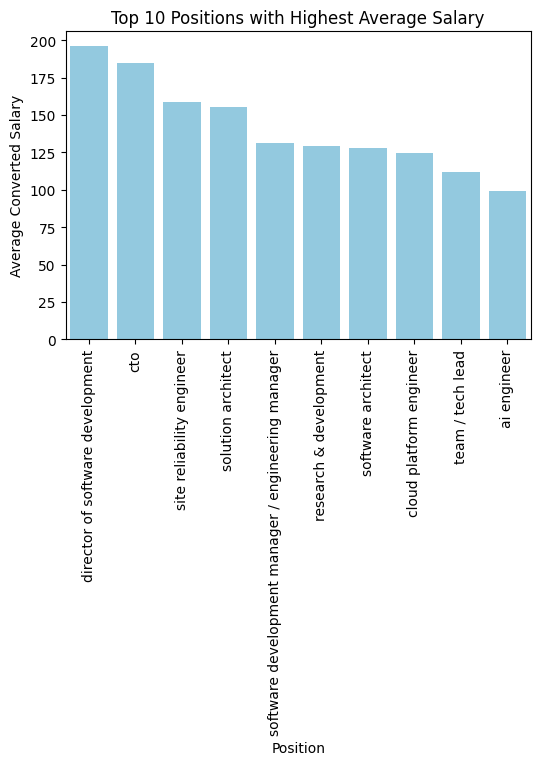

In [53]:
# Group by 'position' and calculate the mean converted salary for each group
average_salary_by_position = df.groupby('position')['converted_salary'].mean().reset_index()

# Sort the positions by average salary in descending order
top_10_positions = average_salary_by_position.sort_values(by='converted_salary', ascending=False).head(10)

# Plotting
plt.figure(figsize=(6, 4))
sns.barplot(x='position', y='converted_salary', data=top_10_positions, color='skyblue')
plt.title('Top 10 Positions with Highest Average Salary')
plt.xlabel('Position')
plt.ylabel('Average Converted Salary')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('top_10_positions_salary.png', bbox_inches='tight')  # Use bbox_inches='tight' to fit the entire plot

plt.show()

## Outlier Detection

In [54]:
# Calculate z-score for 'converted_salary' column
z_scores_salary = np.abs((df['converted_salary'] - df['converted_salary'].mean()) / df['converted_salary'].std())

# Define threshold for z-score
threshold_salary = 5

# Identify outliers in 'converted_salary' column
outliers_salary = df[z_scores_salary > threshold_salary]

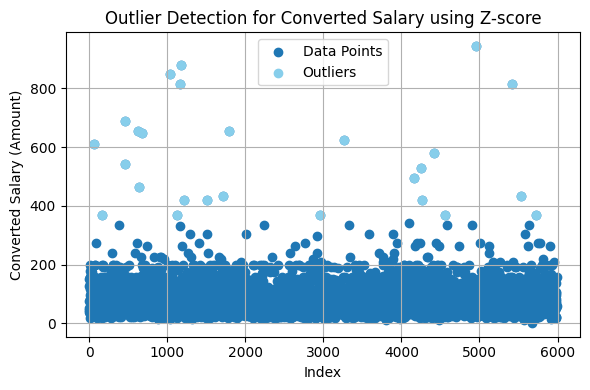

In [55]:
# Plotting
plt.figure(figsize=(6, 4))
plt.scatter(df.index, df['converted_salary'], label='Data Points')
plt.scatter(outliers_salary.index, outliers_salary['converted_salary'], color='skyblue', label='Outliers')
plt.title('Outlier Detection for Converted Salary using Z-score')
plt.xlabel('Index')
plt.ylabel('Converted Salary (Amount)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the plot as an image file
plt.savefig('outlier_detection_scatter_plot.png')

# Show the plot
plt.show()

In [56]:
# Remove rows with outliers from the DataFrame
df_no_outliers = df[z_scores_salary <= threshold_salary]

### Distrubition

In [57]:
# Get the list of column names
columns = df.columns

In [ ]:
###

### position OHE

In [59]:
df["position"].nunique()

46

In [60]:
# Apply one-hot encoding to 'position' column
one_hot_encoded = pd.get_dummies(df_no_outliers['position']).add_prefix("position_")

# Concatenate the one-hot encoded columns with the original DataFrame
df_no_outliers = pd.concat([df_no_outliers, one_hot_encoded], axis=1)

# Drop the original 'position' column
df_no_outliers.drop('position', axis=1, inplace=True)

### Correlation

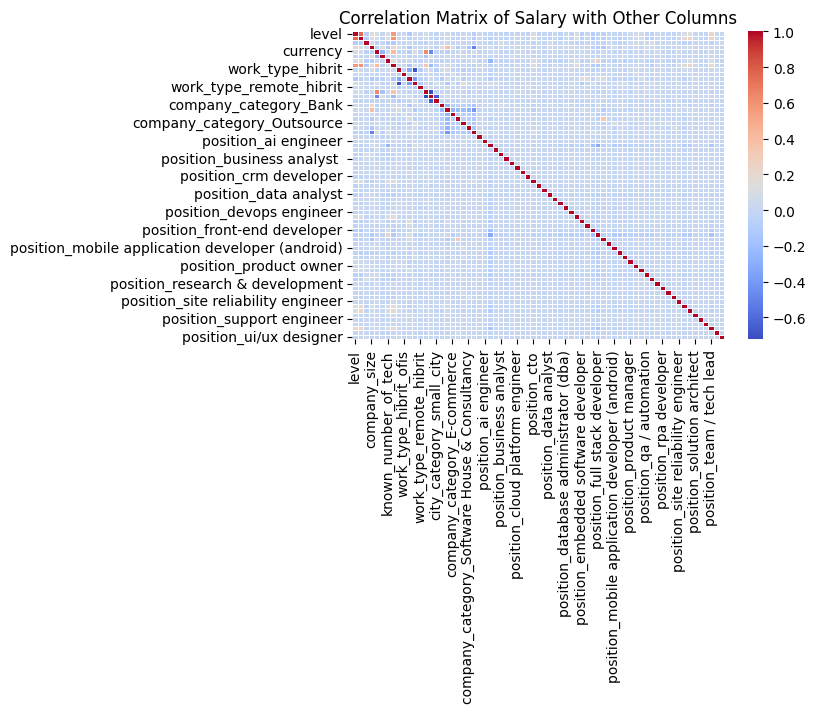

In [61]:
# Compute the correlation matrix
correlation_matrix = df_no_outliers.corr()

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Salary with Other Columns')

# Save the plot as an image file
plt.savefig('correlation_matrix_heatmap.png', bbox_inches='tight')

# Show the plot
plt.show()

## Train, Test Split

In [ ]:
# Drop irrelevant columns or columns with too many missing values
X = df_no_outliers.drop(columns=['converted_salary'])
y = df_no_outliers['converted_salary']

In [ ]:
# Split the train data for training and validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Preprocessing

### Scaling

In [ ]:
# Initialize the scalers
standard_scaler = StandardScaler()

# Fit and transform the training data with each scaler
X_train_scaled_standard = standard_scaler.fit_transform(X_train)

# Transform the test data using the fitted scalers
X_test_scaled_standard = standard_scaler.transform(X_test)

Algorithms that don't require feature scaling:

Tree-based algorithms: Decision Trees, Random Forests, and Gradient Boosting Trees are not sensitive to the scale of features. These algorithms make decisions based on feature thresholds, so scaling doesn't affect their performance.

### PCA

In [ ]:
# Apply PCA after each scaling method
def apply_pca(X_train, X_test):
    pca = PCA(n_components=0.95)  # Retain 95% of the variance
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    return X_train_pca, X_test_pca

# Apply PCA for standardized scaled data
X_train_pca_standard, X_test_pca_standard = apply_pca(X_train_scaled_standard, X_test_scaled_standard)

## Model, Fine-Tuning, Grid Search

### Random Forest Model

In [ ]:
# Initialize and train the random forest regressor
rf = RandomForestRegressor()
rf.fit(X_train_pca_standard, y_train)

# Calculate the score
score = rf.score(X_test_pca_standard, y_test)
print("R2 Score:", score)
print("**************************")

# Get feature importances
importances = rf.feature_importances_

# Get column names before applying PCA
column_names = X_train.columns

# Create a dictionary mapping feature names to importances
importance_dict = dict(zip(column_names, importances))

# Sort the dictionary by importance (descending order)
importance_dict = {k: v for k, v in sorted(importance_dict.items(), key=lambda item: item[1], reverse=True)}

# Print the feature importances
print("Feature Importances:")
for feature, importance in importance_dict.items():
    print(f"{feature}: {importance}")

### GridSearchCV

In [ ]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')

# Perform the grid search
grid_search.fit(X_train_pca_standard, y_train)

In [ ]:
# Best parameters found
print("Best Parameters:", grid_search.best_params_)

In [ ]:
# Best estimator found
best_rf = grid_search.best_estimator_

# Score of the best estimator on the test set
print("R2 Score of the Best Estimator:", best_rf.score(X_test_pca_standard, y_test))

In [ ]:
# Get feature importances
importances = best_rf.feature_importances_

# Get column names
feature_names = X_train.columns

# Create a dictionary mapping feature names to importances
importance_dict = dict(zip(feature_names, importances))

# Sort the dictionary by importance (descending order)
importance_dict = {k: v for k, v in sorted(importance_dict.items(), key=lambda item: item[1], reverse=True)}

# Print the feature importances
print("Feature Importances:")
for feature, importance in importance_dict.items():
    print(f"{feature}: {importance}")

## Export Processed Dataset

In [ ]:
# Assuming df is your DataFrame
df_no_outliers.to_excel('dataset/processed/converted_salary.xlsx', index=False)
# Assuming df is your DataFrame
df_no_outliers.to_csv('dataset/processed/converted_salary.csv', index=False)

## Export Model

In [ ]:
# Export the trained model to a file
with open('model/random_forest_model.pkl', 'wb') as file:
    pickle.dump(best_rf, file)

## Load Model

In [ ]:
# Load the model from the pickle file
with open('model/random_forest_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

## Last Mini Model

In [212]:
mini = df_no_outliers.iloc[:, :8]  # Select all rows and first 8 columns
mini.to_excel('../dataset/processed/mini.xlsx', index=False)
mini.to_csv('../dataset/processed/mini.csv', index=False)

mini_df = pd.read_excel("../dataset/processed/mini.xlsx")

In [222]:
mini_x = mini_df.drop(columns=['converted_salary')
mini_y = mini_df["converted_salary"]

In [223]:
mini.shape

(5950, 8)

In [224]:
# Split the train data for training and validation
mini_X_train, mini_X_test, mini_y_train, mini_y_test = train_test_split(mini_x,mini_y, test_size=0.2, random_state=42)

### Linear Regression

In [225]:
# Initialize the scalers
standard_scaler = StandardScaler()

# Fit and transform the training data with each scaler
X_train_scaled_standard_mini = standard_scaler.fit_transform(mini_X_train)

# Transform the test data using the fitted scalers
X_test_scaled_standard_mini = standard_scaler.transform(mini_X_test)

In [226]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize and train the linear regression model
lr_mini = LinearRegression()
lr_mini.fit(X_train_scaled_standard_mini, mini_y_train)

# Predict the target variable on the test set
y_pred = lr_mini.predict(X_test_scaled_standard_mini)

# Calculate the R2 Score
score = lr_mini.score(X_test_scaled_standard_mini, mini_y_test)
print("R2 Score:", score)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(mini_y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(mini_y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("**************************")

# Get coefficients (weights) and intercept
coefficients = lr_mini.coef_
intercept = lr_mini.intercept_

# Create a dictionary mapping feature names to coefficients
coefficient_dict = dict(zip(mini_x.columns, coefficients))

# Print the coefficients
print("Feature Coefficients:")
for feature, coefficient in coefficient_dict.items():
    print(f"{feature}: {coefficient}")

# Print the intercept
print("Intercept:", intercept)


R2 Score: 0.5474511735589933
Mean Absolute Error (MAE): 19.649043807305034
Mean Squared Error (MSE): 835.0107615703151
**************************
Feature Coefficients:
level: 10.70015299068341
experience: 15.271582935441685
gender: -2.4142145000489226
company_size: 6.922001621291743
currency: 16.826217730931198
raise_period: 2.508970685943539
known_number_of_tech: 1.5661590912815224
Intercept: 77.6754768907563


In [227]:
# Export the trained model to a file
with open('../model/lr_mini.pkl', 'wb') as file:
    pickle.dump(lr_mini, file)

# Load the model from the pickle file
with open('../model/lr_mini.pkl', 'rb') as file:
    loaded_model1 = pickle.load(file)

pred = loaded_model1.predict([[2,7,0,1,0,2,1]])

actual = mini_df["converted_salary"][0]

print(f"predicted: {pred} \nActual Value: {actual}.", )

predicted: [219.4829655] 
Actual Value: 152.5.
